### NEXRAD Introduction

Part 1: NEXRAD Level-II (Base) Data

Part 2: NEXRAD Level-III Products

Part 3: ARM CSAPR Data

NEXRAD Level-III data is measured at 6 elevation angles, and they are approximately: $0.5^{\circ}$, $0.8^{\circ}$, $1.5^{\circ}$, $1.8^{\circ}$, $2.4^{\circ}$, and $3.4^{\circ}$.

I plan to use four variables (scan type: PPI), which are Horizontal Reflectivity ($Z_H$), Differential Reflectivity ($Z_{DR}$), Correlation Coefficient ($\rho_{HV}$) and Specific Differential Phase ($K_{DP}$), to build input matrix for CNN after checking paper [1-2].

### Datasets

Vance AFB NEXRAD Level-III data measured at $0.5^{\circ}$ from 2010-01-01 to 2018-10-01 stored in /home/ylk/data on dgx machine.

### References

[1] Al-Sakka, Hassan, et al. "A new fuzzy logic hydrometeor classification scheme applied to the French X-, C-, and S-band polarimetric radars." Journal of Applied Meteorology and Climatology 52.10 (2013): 2328-2344.

[2] Wang, Haijiang, et al. "Study on deep-learning-based identification of hydrometeors observed by dual polarization Doppler weather radars." EURASIP Journal on Wireless Communications and Networking 2017.1 (2017): 173.

### Appendix

[NEXRAD Products](https://www.ncdc.noaa.gov/data-access/radar-data/nexrad-products)

[NEXRAD Level-III Products Code](https://www1.ncdc.noaa.gov/pub/data/radar/RadarProductsDetailedTable.pdf)

[Measurement of the Elevation Angle](http://www.radartutorial.eu/01.basics/Measurement%20of%20the%20elevation%20angle.en.html)

In [2]:
%matplotlib inline
# load the lib
import pyart
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15.0, 15.0]
import warnings
warnings.filterwarnings('ignore')

### Part 1: NEXRAD Level-II (Base) Data

In [3]:
# read level 2 data
raw = pyart.io.read('data/KVNX20110810_000653_V06')

In [4]:
# check the metadata
raw.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float64 and shape: (7200,)>
elevation: <ndarray of type: float32 and shape: (7200,)>
fields:
	differential_reflectivity: <ndarray of type: float32 and shape: (7200, 1832)>
	reflectivity: <ndarray of type: float32 and shape: (7200, 1832)>
	spectrum_width: <ndarray of type: float32 and shape: (7200, 1832)>
	velocity: <ndarray of type: float32 and shape: (7200, 1832)>
	differential_phase: <ndarray of type: float32 and shape: (7200, 1832)>
	cross_correlation_ratio: <ndarray of type: float32 and shape: (7200, 1832)>
fixed_angle: <ndarray of type: float32 and shape: (16,)>
instrument_parameters:
	unambiguous_range: <ndarray of type: float32 and shape: (7200,)>
	nyquist_velocity: <ndarray of type: float32 and shape: (7200,)>
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 16
ngates: 1832
nrays: 7200
rada

In [5]:
# fixed angle
raw.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([  0.48339844,   0.48339844,   1.45019531,   1.45019531,
          2.41699219,   3.38378906,   4.30664062,   5.31738281,
          6.19628906,   7.51464844,   8.70117188,  10.01953125,
         11.99707031,  14.01855469,  16.69921875,  19.51171875], dtype=float32)}

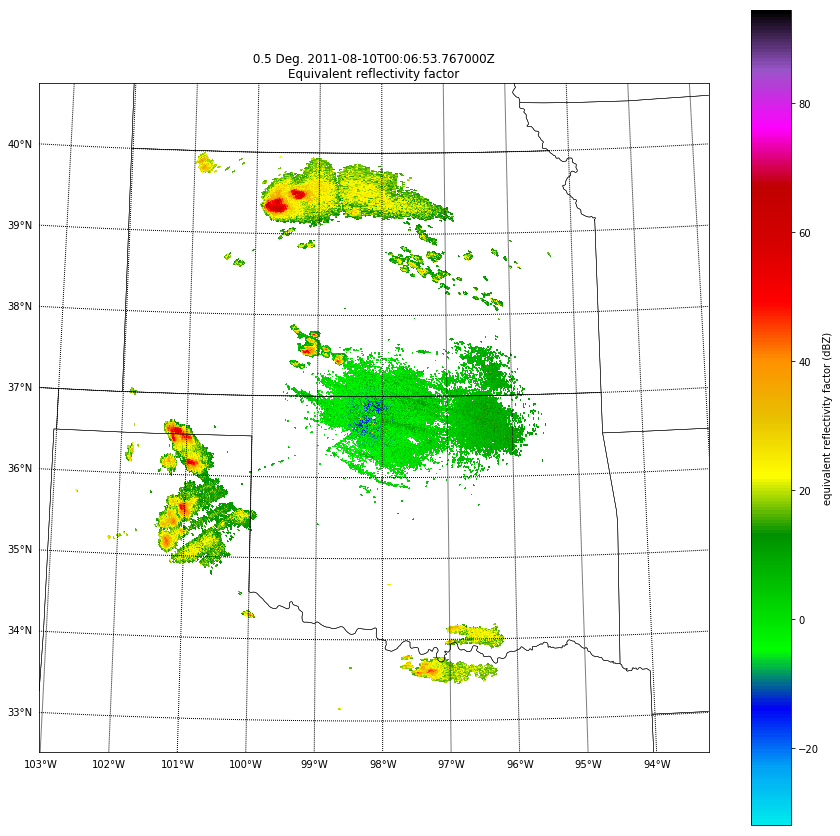

In [6]:
display = pyart.graph.RadarMapDisplay(raw)
display.plot_ppi_map('reflectivity')

### Part 2: NEXRAD Level-III Products

In [7]:
# read level 3 data
# Base Reflectivity
N0Z = pyart.io.read('data/KVNX_20110810/KOUN_SDUS74_N0ZVNX_201108100006')

In [8]:
# check the metadata
N0Z.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (360,)>
elevation: <ndarray of type: float32 and shape: (360,)>
fields:
	reflectivity: <ndarray of type: float32 and shape: (360, 230)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 1
ngates: 230
nrays: 360
radar_calibration: None
range: <ndarray of type: float32 and shape: (230,)>
scan_rate: None
scan_type: ppi
sweep_end_ray_index: <ndarray of type: int32 and shape: (1,)>
sweep_mode: <ndarray of type: |S20 and shape: (1,)>
sweep_number: <ndarray of type: int32 and shape: (1,)>
sweep_start_ray_index: <ndarray of type: int32 and shape: (1,)>
target_scan_rate: None
time: <ndarray of type: float64 and shape: (360,)>
metadata:
	Conventions: CF/Radial instrument_parameters
	version: 1.3
	title: 
	in

In [9]:
# fixed angle
N0Z.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([ 0.5], dtype=float32)}

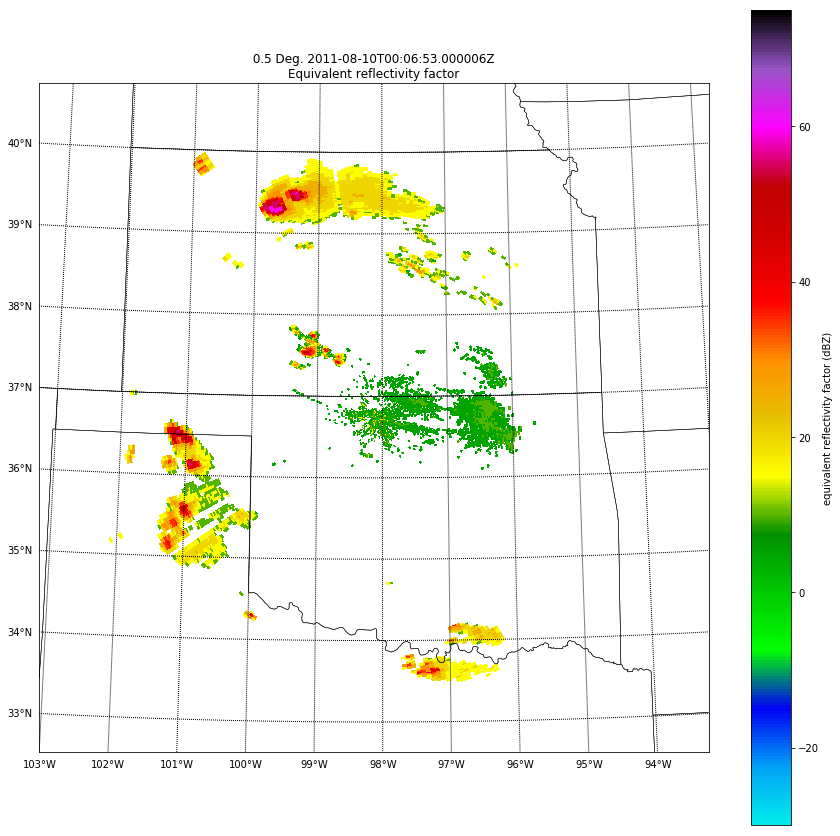

In [10]:
display = pyart.graph.RadarMapDisplay(N0Z)
display.plot_ppi_map('reflectivity')

In [11]:
# radar = pyart.io.read_nexrad_level3('data/KVNX_20110810/KOUN_SDUS84_N1XVNX_201108100300')

# Differential Reflectivity (approx. elev. angle: 0.5 deg)
N0X = pyart.io.read('data/KVNX_20110810/KOUN_SDUS84_N0XVNX_201108100006')

# Correlation Coefficient (approx. elev. angle: 0.5 deg) 
N0C = pyart.io.read('data/KVNX_20110810/KOUN_SDUS84_N0CVNX_201108100006')

# Specific Differential Phase (approx. elev.: 0.5 deg)
N0K = pyart.io.read('data/KVNX_20110810/KOUN_SDUS84_N0KVNX_201108100006')

# Hydrometeor Classification (approx. elev.: 0.5 deg) 
N0H = pyart.io.read('data/KVNX_20110810/KOUN_SDUS84_N0HVNX_201108100006')

In [12]:
# check the metadata of N0X
N0X.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (360,)>
elevation: <ndarray of type: float32 and shape: (360,)>
fields:
	differential_reflectivity: <ndarray of type: float32 and shape: (360, 1200)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 1
ngates: 1200
nrays: 360
radar_calibration: None
range: <ndarray of type: float32 and shape: (1200,)>
scan_rate: None
scan_type: ppi
sweep_end_ray_index: <ndarray of type: int32 and shape: (1,)>
sweep_mode: <ndarray of type: |S20 and shape: (1,)>
sweep_number: <ndarray of type: int32 and shape: (1,)>
sweep_start_ray_index: <ndarray of type: int32 and shape: (1,)>
target_scan_rate: None
time: <ndarray of type: float64 and shape: (360,)>
metadata:
	Conventions: CF/Radial instrument_parameters
	version: 

In [13]:
# check the metadata of N0C
N0C.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (360,)>
elevation: <ndarray of type: float32 and shape: (360,)>
fields:
	cross_correlation_ratio: <ndarray of type: float32 and shape: (360, 1200)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 1
ngates: 1200
nrays: 360
radar_calibration: None
range: <ndarray of type: float32 and shape: (1200,)>
scan_rate: None
scan_type: ppi
sweep_end_ray_index: <ndarray of type: int32 and shape: (1,)>
sweep_mode: <ndarray of type: |S20 and shape: (1,)>
sweep_number: <ndarray of type: int32 and shape: (1,)>
sweep_start_ray_index: <ndarray of type: int32 and shape: (1,)>
target_scan_rate: None
time: <ndarray of type: float64 and shape: (360,)>
metadata:
	Conventions: CF/Radial instrument_parameters
	version: 1.

In [14]:
# check the metadata of N0K
N0K.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (360,)>
elevation: <ndarray of type: float32 and shape: (360,)>
fields:
	specific_differential_phase: <ndarray of type: float32 and shape: (360, 1200)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 1
ngates: 1200
nrays: 360
radar_calibration: None
range: <ndarray of type: float32 and shape: (1200,)>
scan_rate: None
scan_type: ppi
sweep_end_ray_index: <ndarray of type: int32 and shape: (1,)>
sweep_mode: <ndarray of type: |S20 and shape: (1,)>
sweep_number: <ndarray of type: int32 and shape: (1,)>
sweep_start_ray_index: <ndarray of type: int32 and shape: (1,)>
target_scan_rate: None
time: <ndarray of type: float64 and shape: (360,)>
metadata:
	Conventions: CF/Radial instrument_parameters
	version

In [15]:
# check the metadata of N0H
N0H.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (360,)>
elevation: <ndarray of type: float32 and shape: (360,)>
fields:
	radar_echo_classification: <ndarray of type: float32 and shape: (360, 1200)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 1
ngates: 1200
nrays: 360
radar_calibration: None
range: <ndarray of type: float32 and shape: (1200,)>
scan_rate: None
scan_type: ppi
sweep_end_ray_index: <ndarray of type: int32 and shape: (1,)>
sweep_mode: <ndarray of type: |S20 and shape: (1,)>
sweep_number: <ndarray of type: int32 and shape: (1,)>
sweep_start_ray_index: <ndarray of type: int32 and shape: (1,)>
target_scan_rate: None
time: <ndarray of type: float64 and shape: (360,)>
metadata:
	Conventions: CF/Radial instrument_parameters
	version: 

In [16]:
# check the echo classification types
N0H.fields

{'radar_echo_classification': {'units': 'legend',
  'standard_name': 'radar_echo_classification',
  'long_name': 'Radar echo classification',
  'options': '0: Below Threshold (ND), 10: Biological (BI), 20: Anomalous Propagation/Group Clutter (GC), 30: Ice Crystals (IC), 40: Dry Snow (DS), 50: Wet Snow (WS), 60: Light and/or Moderate Rain (RA), 70: Heavy Rain (HR), 80: Big Drops (rain) (BD), 90: Graupel (GR), 100: Hail, possibly with rain (HA), 140: Unknown Classification (UK), 150: Range Folded (RH)',
  'coordinates': 'elevation azimuth range',
  '_FillValue': -9999.0,
  'data': masked_array(data =
   [[-- -- -- ..., -- -- --]
   [-- -- -- ..., -- -- --]
   [-- -- -- ..., -- -- --]
   ..., 
   [-- -- -- ..., -- -- --]
   [-- -- -- ..., -- -- --]
   [-- -- -- ..., -- -- --]],
               mask =
   [[ True  True  True ...,  True  True  True]
   [ True  True  True ...,  True  True  True]
   [ True  True  True ...,  True  True  True]
   ..., 
   [ True  True  True ...,  True  True  True

In [17]:
# fixed angle of N0X
N0X.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([ 0.5], dtype=float32)}

In [18]:
# fixed angle of N0H
N0H.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([ 0.5], dtype=float32)}

[4.6875 4.4375 3.8125 ..., 7.5625 7.9375 7.9375]


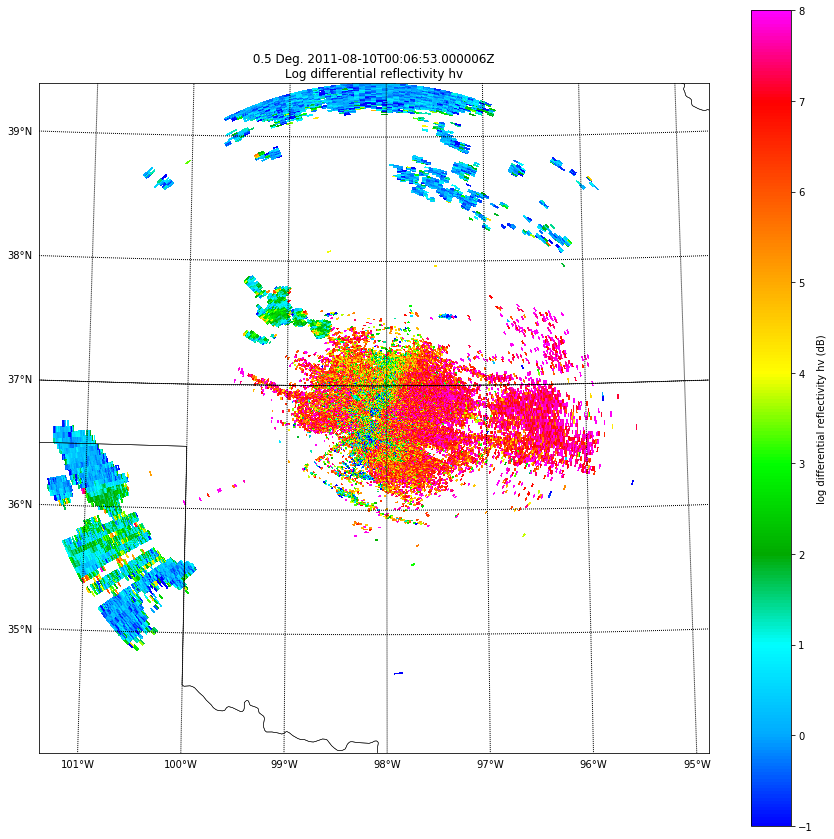

In [19]:
# Differential reflectivity
x = N0X.fields['differential_reflectivity']['data']
y = x[~x.mask]
print(y)

display = pyart.graph.RadarMapDisplay(N0X)
display.plot_ppi_map('differential_reflectivity')

[0.7583333253860474 0.8050000071525574 0.824999988079071 ...,
 1.0516666173934937 1.0516666173934937 1.0516666173934937]


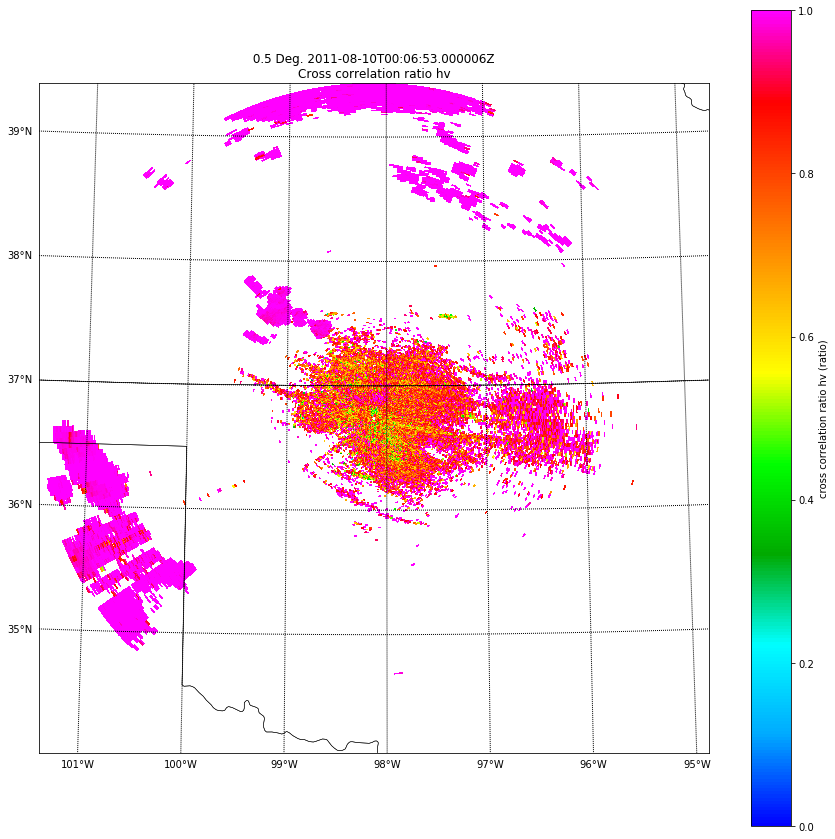

In [20]:
# Correlation Coefficient (RHOHV)
x = N0C.fields['cross_correlation_ratio']['data']
y = x[~x.mask]
print(y)

display = pyart.graph.RadarMapDisplay(N0C)
display.plot_ppi_map('cross_correlation_ratio')

[0.0 0.0 0.0 ..., 0.0 0.0 0.0]


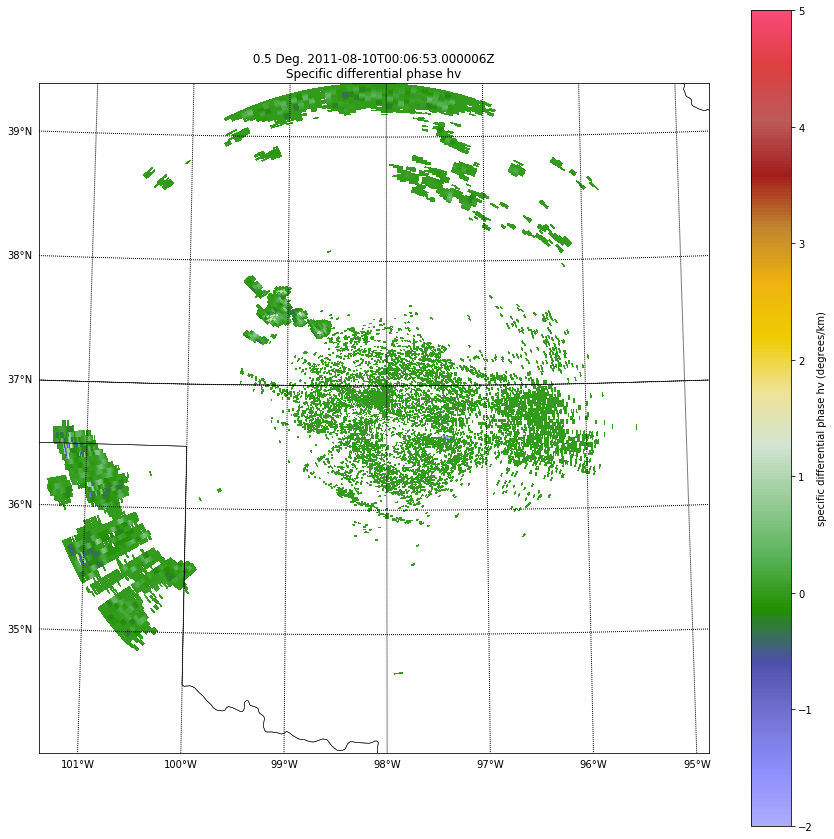

In [21]:
# Specific differential phase (KDP)
x = N0K.fields['specific_differential_phase']['data']
y = x[~x.mask]
print(y)

display = pyart.graph.RadarMapDisplay(N0K)
display.plot_ppi_map('specific_differential_phase')

[20.0 10.0 10.0 ..., 10.0 10.0 10.0]


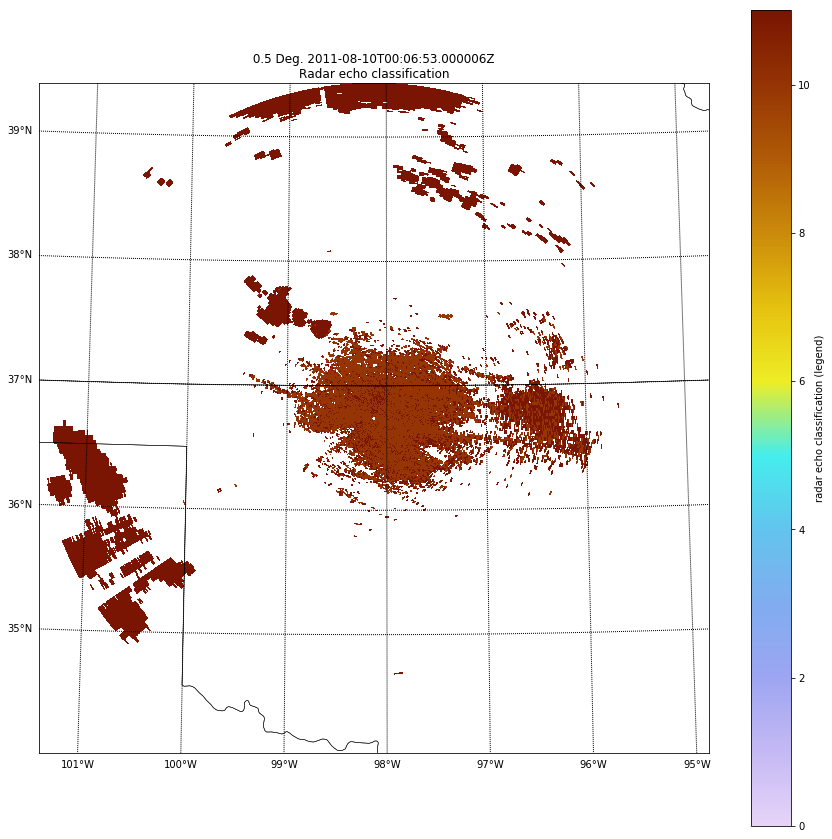

In [22]:
# Radar echo classification
x = N0H.fields['radar_echo_classification']['data']
y = x[~x.mask]
print(y)

display = pyart.graph.RadarMapDisplay(N0H)
display.plot_ppi_map('radar_echo_classification')

### Part 3: ARM CSAPR Data

In [23]:
radar = pyart.io.read('data/110635.mdv')

In [24]:
radar.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float64 and shape: (6120,)>
elevation: <ndarray of type: float64 and shape: (6120,)>
fields:
	specific_differential_phase: <ndarray of type: float32 and shape: (6120, 983)>
	normalized_coherent_power: <ndarray of type: float32 and shape: (6120, 983)>
	spectrum_width: <ndarray of type: float32 and shape: (6120, 983)>
	differential_reflectivity: <ndarray of type: float32 and shape: (6120, 983)>
	cross_correlation_ratio: <ndarray of type: float32 and shape: (6120, 983)>
	velocity: <ndarray of type: float32 and shape: (6120, 983)>
	differential_phase: <ndarray of type: float32 and shape: (6120, 983)>
	reflectivity: <ndarray of type: float32 and shape: (6120, 983)>
fixed_angle: <ndarray of type: float32 and shape: (17,)>
instrument_parameters:
	prt_mode: <ndarray of type: |S5 and shape: (17,)>
	prt: <ndarray of type: float32 and shape: (6120,)>
	unambiguous_range: <nda

In [25]:
radar.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([  0.75      ,   1.20000005,   1.89999998,   2.5999999 ,
          3.5       ,   4.4000001 ,   5.30000019,   6.4000001 ,
          7.80000019,   9.60000038,  11.69999981,  14.30000019,
         17.5       ,  21.39999962,  26.10000038,  33.        ,  42.        ], dtype=float32)}

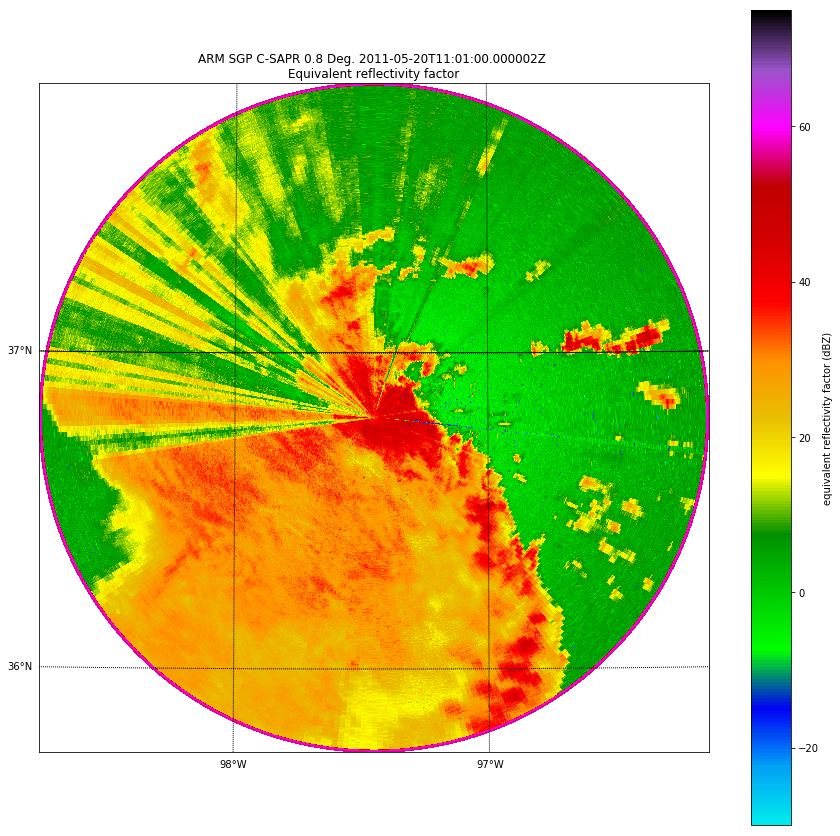

In [26]:
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity')

### Questions

1. Raw data and Level-III data have different gate size. Are they measured at different resolution? 
2. How to handle missing values? Is it OK to replace NA with zero?
3. How to use classification results?